In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [87]:
#load data
df = pd.read_csv(r"C:\Users\Collin\OneDrive - Gettysburg College\Gettysburg Spring 2025\DS 311 Data Visualizations\Github\Passing-Heatmap\Data\nfl_data.csv")
df.head()

,team,week,name,pass_type,x,y,season
0,ARI,1,Kyler Murray,COMPLETE,-21.227102,0.031909,2020
1,ARI,1,Kyler Murray,COMPLETE,13.811042,6.654193,2020
2,ARI,1,Kyler Murray,COMPLETE,-11.848734,4.253002,2020
3,ARI,1,Kyler Murray,COMPLETE,5.388568,-0.568744,2020
4,ARI,1,Kyler Murray,COMPLETE,-23.583576,15.900376,2020


In [88]:
quarterback = 'Kyler Murray'
week = 10
season = 2019

#add error handling for quarterback names 

#filter data for specific quarterback and week
qb_df = df[df['name'] == quarterback]
qb_df = qb_df[qb_df['week'] == week]
qb_df = qb_df[qb_df['season'] == season]

# so qb_df is the df of a qb's play in a week of a season


<Axes: xlabel='x', ylabel='y'>

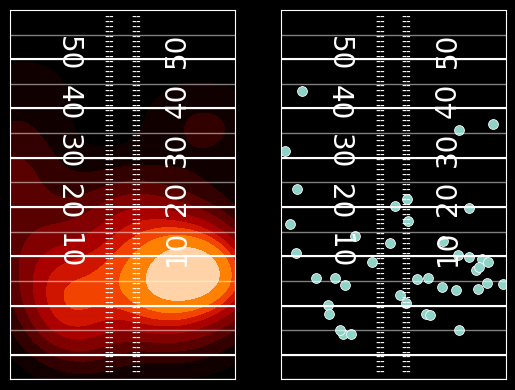

In [89]:
# Field Plot:
fig, (ax1, ax2) = plt.subplots(1, 2) #make 2 plots side by side for both thingys
plt.style.use('dark_background') #black background

ax1.set_xlabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')

ax1.set_xlim(-53.333/2, 53.333/2) #field dimensions
ax1.set_ylim(-15,60)

for h in range(-15,60-1,1): #create hash marks
    ax1.annotate('--', (-3.1, h-0.5), ha='center', fontsize=10)
    ax1.annotate('--', (3.1, h-0.5), ha='center', fontsize=10)

for y in range(-15, 60-1, 5): #create yard lines this is the feint 5 yards line
    ax1.axhline(y, color ='white', ls = '-', alpha = 0.5, lw = 1)

for i in range(-10, 60, 10): #this is the bold 10 yard line
    ax1.axhline(i, color ='white', ls='-', alpha=1, lw=1.5)

for i in range(10, 60-1, 10): #create yard numbers
    ax1.annotate(str(i), (-12.88, i-1.15), ha='center', fontsize=20, rotation=270)
    ax1.annotate(str(i), (12.88, i-0.65), ha='center', fontsize=20, rotation=90)

# same for ax2
ax2.set_xlabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylabel('')

ax2.set_xlim(-53.333/2, 53.333/2)
ax2.set_ylim(-15,60)

for h in range(-15,60-1,1): #create hash marks
    ax2.annotate('--', (-3.1, h-0.5), ha='center', fontsize=10)
    ax2.annotate('--', (3.1, h-0.5), ha='center', fontsize=10)

for y in range(-15, 60-1, 5): #create yard lines this is the feint 5 yards line
    ax2.axhline(y, color ='white', ls = '-', alpha = 0.5, lw = 1)

for i in range(-10, 60, 10): #this is the bold 10 yard line
    ax2.axhline(i, color ='white', ls='-', alpha = 1, lw = 1.5)

for i in range(10, 60-1, 10): #create yard numbers
    ax2.annotate(str(i), (-12.88, i-1.15), ha='center', fontsize=20, rotation=270)
    ax2.annotate(str(i), (12.88, i-0.65), ha='center', fontsize=20, rotation=90)

sns.kdeplot(data = qb_df, x = qb_df['x'], y = qb_df['y'], ax = ax1, cmap = "gist_heat", fill = True, thresh = 0.05, n_levels = 10) #heatmap
# straighfoward, I played with thresh a lot to get it close to what the guy had.

# x_complete = qb_df[qb_df['pass_type'] == 'COMPLETE']['x']
# y_complete = qb_df[qb_df['pass_type'] == 'COMPLETE']['y']

sns.scatterplot(x = qb_df.x, y = qb_df.y, ax = ax2, s = 50) #scatterplot of pass locations



In [90]:
from ipywidgets import interact, widgets
# Create dropdown widgets for quarterback, week, and season
qb_dropdown = widgets.Dropdown(
    options=df['name'].unique(),
    value=quarterback,
    description='QB:',
)

week_dropdown = widgets.Dropdown(
    options=sorted(df['week'].unique()),
    value=week,
    description='Week:',
)

season_dropdown = widgets.Dropdown(
    options=sorted(df['season'].unique()),
    value=season,
    description='Season:',
)

def update_options(*args):
    # Update week and season options based on the selected quarterback
    filtered_df = df[df['name'] == qb_dropdown.value]
    week_dropdown.options = sorted(filtered_df['week'].unique())
    season_dropdown.options = sorted(filtered_df['season'].unique())

# Attach the update_options function to the quarterback dropdown
qb_dropdown.observe(update_options, names='value')


# Function to update the plots based on dropdown selection
def update_plots(selected_qb, selected_week, selected_season):
    global qb_df, quarterback, week, season
    quarterback = selected_qb
    week = selected_week
    season = selected_season
    
    # Filter data for the selected quarterback, week, and season
    qb_df = df[(df['name'] == quarterback) & (df['week'] == week) & (df['season'] == season)]
    
    # Update the plots (you may need to re-run the plotting code here)
    print(f"Selected QB: {quarterback}, Week: {week}, Season: {season}")
    # Optionally, clear and redraw the plots here

# Create an interactive widget
interact(update_plots, selected_qb=qb_dropdown, selected_week=week_dropdown, selected_season=season_dropdown)

interactive(children=(Dropdown(description='QB:', options=('Kyler Murray', 'Chris Streveler', 'Matt Ryan', 'La…

<function __main__.update_plots(selected_qb, selected_week, selected_season)>

In [91]:
def update_plots(selected_qb, selected_week, selected_season):
    global qb_df, quarterback, week, season, ax1, ax2, ax3
    
    # Update the global variables
    quarterback = selected_qb
    week = selected_week
    season = selected_season
    
    # Filter data for the selected quarterback, week, and season
    qb_df = df[(df['name'] == quarterback) & (df['week'] == week) & (df['season'] == season)]
    
    # Clear the axes
    ax1.clear()
    ax2.clear()
    ax3.clear()
    
    # Redraw the plots
    # Completions Heatmap
    x_complete = qb_df[qb_df['pass_type'].isin(['COMPLETE', 'TOUCHDOWN'])]['x']
    y_complete = qb_df[qb_df['pass_type'].isin(['COMPLETE', 'TOUCHDOWN'])]['y']
    sns.kdeplot(x=x_complete, y=y_complete, ax=ax1, cmap='summer', fill=True, thresh=0.2, n_levels=10)
    ax1.set_title('Completions')
    
    # Incompletions Heatmap
    x_incomplete = qb_df[qb_df['pass_type'].isin(['INCOMPLETE', 'INTERCEPTION'])]['x']
    y_incomplete = qb_df[qb_df['pass_type'].isin(['INCOMPLETE', 'INTERCEPTION'])]['y']
    sns.kdeplot(x=x_incomplete, y=y_incomplete, ax=ax2, cmap='winter', fill=True, thresh=0.2, n_levels=10)
    ax2.set_title('Incompletions')
    
    # Scatterplot for all passes
    palette = {'COMPLETE': 'lime', 'INCOMPLETE': 'red', 'TOUCHDOWN': 'gold', 'INTERCEPTION': 'purple'}
    marker_styles = {'COMPLETE': 'o', 'INCOMPLETE': 'X', 'TOUCHDOWN': 'P', 'INTERCEPTION': 'D'}
    for pass_type, marker in marker_styles.items():
        subset = qb_df[qb_df['pass_type'] == pass_type]
        sns.scatterplot(
            x=subset.x, 
            y=subset.y, 
            ax=ax3, 
            s=50, 
            marker=marker, 
            label=pass_type, 
            color=palette[pass_type], 
            edgecolor='black'
        )
    ax3.set_title('All Passes')
    ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Refresh the figure
    fig.canvas.draw_idle()

# Recreate the interactive widget
interact(update_plots, selected_qb=qb_dropdown, selected_week=week_dropdown, selected_season=season_dropdown)

interactive(children=(Dropdown(description='QB:', options=('Kyler Murray', 'Chris Streveler', 'Matt Ryan', 'La…

<function __main__.update_plots(selected_qb, selected_week, selected_season)>

No data for pass type: COMPLETE
No data for pass type: INCOMPLETE
No data for pass type: TOUCHDOWN
No data for pass type: INTERCEPTION
No scatterplot points found in ax3.collections.
No legend items to display.


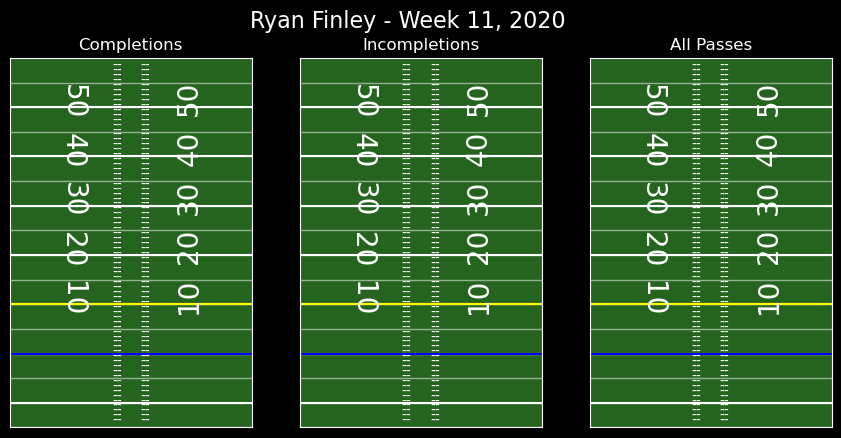

In [ ]:

qb_df = df[(df['name'] == quarterback) & (df['week'] == week) & (df['season'] == season)]

# Field Plot:
# fig, (ax1, ax2) = plt.subplots(1, 2) #make 2 plots side by side for both thingys

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10.6, 4.8)) # make 3 plots side by side

plt.style.use('dark_background') #black background


fig.suptitle(f'{quarterback} - Week {week}, {season}', fontsize=16)

# Set green background for all plots
ax1.set_facecolor('#25641e')
ax2.set_facecolor('#25641e')
ax3.set_facecolor('#25641e')

#ax1####
ax1.set_xlabel('')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')

ax1.set_xlim(-53.333/2, 53.333/2) #field dimensions
ax1.set_ylim(-15,60)

for h in range(-15,60-1,1): #create hash marks
    ax1.annotate('--', (-3.1, h-0.5), ha='center', fontsize=10)
    ax1.annotate('--', (3.1, h-0.5), ha='center', fontsize=10)

for y in range(-15, 60-1, 5): #create yard lines this is the feint 5 yards line
    ax1.axhline(y, color ='white', ls = '-', alpha = 0.5, lw = 1)

for i in range(-10, 60, 10): #this is the bold 10 yard line
    ax1.axhline(i, color ='white', ls='-', alpha=1, lw=1.5)

for i in range(10, 60-1, 10): #create yard numbers
    ax1.annotate(str(i), (-12.88, i-1.15), ha='center', fontsize=20, rotation=270)
    ax1.annotate(str(i), (12.88, i-0.65), ha='center', fontsize=20, rotation=90)


# add line of scrimmage:
ax1.axhline(0, color='blue', ls='-', alpha=1, lw=1.5)
ax1.axhline(10, color='yellow', ls='-', alpha=1, lw=1.5)
ax1.title.set_text('Completions')


#ax2####
ax2.set_xlabel('')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylabel('')

ax2.set_xlim(-53.333/2, 53.333/2)
ax2.set_ylim(-15,60)

for h in range(-15,60-1,1): #create hash marks
    ax2.annotate('--', (-3.1, h-0.5), ha='center', fontsize=10)
    ax2.annotate('--', (3.1, h-0.5), ha='center', fontsize=10)

for y in range(-15, 60-1, 5): #create yard lines this is the feint 5 yards line
    ax2.axhline(y, color ='white', ls = '-', alpha = 0.5, lw = 1)

for i in range(-10, 60, 10): #this is the bold 10 yard line
    ax2.axhline(i, color ='white', ls='-', alpha = 1, lw = 1.5)

for i in range(10, 60-1, 10): #create yard numbers
    ax2.annotate(str(i), (-12.88, i-1.15), ha='center', fontsize=20, rotation=270)
    ax2.annotate(str(i), (12.88, i-0.65), ha='center', fontsize=20, rotation=90)
    
    
# add line of scrimmage:
ax2.axhline(0, color='blue', ls='-', alpha=1, lw=1.5)
ax2.axhline(10, color='yellow', ls='-', alpha=1, lw=1.5)

ax2.title.set_text('Incompletions')

# same for ax3 ######
ax3.set_xlabel('')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylabel('')

ax3.set_xlim(-53.333/2, 53.333/2)
ax3.set_ylim(-15,60)

for h in range(-15,60-1,1): #create hash marks
    ax3.annotate('--', (-3.1, h-0.5), ha='center', fontsize=10)
    ax3.annotate('--', (3.1, h-0.5), ha='center', fontsize=10)

for y in range(-15, 60-1, 5): #create yard lines this is the feint 5 yards line
    ax3.axhline(y, color ='white', ls = '-', alpha = 0.5, lw = 1)

for i in range(-10, 60, 10): #this is the bold 10 yard line
    ax3.axhline(i, color ='white', ls='-', alpha = 1, lw = 1.5)

for i in range(10, 60-1, 10): #create yard numbers
    ax3.annotate(str(i), (-12.88, i-1.15), ha='center', fontsize=20, rotation=270)
    ax3.annotate(str(i), (12.88, i-0.65), ha='center', fontsize=20, rotation=90)
    
    
# add line of scrimmage:
ax3.axhline(0, color='blue', ls='-', alpha=1, lw=1.5)
ax3.axhline(10, color='yellow', ls='-', alpha=1, lw=1.5)

ax3.title.set_text('All Passes')


# Making the plots
x_complete = qb_df[qb_df['pass_type'].isin(['COMPLETE', 'TOUCHDOWN'])]['x']
y_complete = qb_df[qb_df['pass_type'].isin(['COMPLETE', 'TOUCHDOWN'])]['y']
x_incomplete = qb_df[qb_df['pass_type'].isin(['INCOMPLETE', 'INTERCEPTION'])]['x']
y_incomplete = qb_df[qb_df['pass_type'].isin(['INCOMPLETE', 'INTERCEPTION'])]['y']

#Completions Heatmap
sns.kdeplot(x = x_complete, y = y_complete, ax = ax1, cmap = 'summer', fill = True, thresh = 0.2, n_levels = 10)

#Incompletions Heatmap
sns.kdeplot(x = x_incomplete, y = y_incomplete, ax = ax2, cmap = 'winter', fill = True, thresh = 0.2, n_levels = 10) #heatmap

# Define a color palette for pass types
palette = {
    'COMPLETE': 'lime',
    'INCOMPLETE': 'red',
    'TOUCHDOWN': 'gold',
    'INTERCEPTION': 'purple'
}

## SHAPES ##
# Define a marker style for each pass type
marker_styles = {
    'COMPLETE': 'o',  # Circle
    'INCOMPLETE': 'X',  # X marker
    'TOUCHDOWN': 'P',  # Plus (filled)
    'INTERCEPTION': 'D'  # Diamond
}

# Add scatterplot with different shapes for pass types
for pass_type, marker in marker_styles.items():
    subset = qb_df[qb_df['pass_type'] == pass_type]
    if subset.empty:
        print(f"No data for pass type: {pass_type}")
        continue
    sns.scatterplot(
        x=subset.x, 
        y=subset.y, 
        ax=ax3, 
        s=50, 
        marker=marker, 
        label=pass_type, 
        color=palette[pass_type], 
        edgecolor='black'
    )

# Bring shapes to the front
for collection in ax3.collections:
    collection.set_zorder(5)

# Make scatter plot points on the frontmost layer
if ax3.collections:
    ax3.collections[-1].set_zorder(10)
else:
    print("No scatterplot points found in ax3.collections.")

# Place the legend outside the plot
handles, labels = ax3.get_legend_handles_labels()
if handles:
    ax3.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))
else:
    print("No legend items to display.")